In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template

In [1]:
def pltshow(imgzz):
    plt.imshow(cv2.cvtColor(imgzz, cv2.COLOR_BGR2RGB))
    
def eqhist(img):
    return cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

def getCanPipe(image, eqHist = False, blur = True, ):
    if eqHist:
        gray = eqhist(image)
    else:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if blur:
        blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
    else:
        blurred = gray
    edged = cv2.Canny(blurred, 100, 300)
    return edged

def sortCorners(corners):
    c = []
    idx = 0
    for i in corners.tolist():
        c.append(i[0])
        idx+=1
    c = sorted(c, key=lambda x:x[1])
    topones = [c[0], c[1]]
    bottomones = [c[2], c[3]]
    topones = sorted(topones, key = lambda x:x[0])
    topleft = topones[0]
    topright = topones[1]

    botones = sorted(bottomones, key = lambda x:x[0])
    bottomleft = botones[0]
    bottomright = botones[1]
    cornersz = [topleft, topright, bottomleft, bottomright]
    return cornersz

def getRect(edged):
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    receiptCnt = None
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:
            receiptCnt = approx
            # print(receiptCnt)
            break
    if receiptCnt is None:
        raise Exception(("No outline, oof"))
    return receiptCnt

def drawRect(image, rect):
    output = image.copy()
    cv2.drawContours(output, [rect], -1, (0, 255, 0), 2)
    pltshow(output)

def histeq(rgb_img):
    ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
    return cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

def subtractMaskFromImg(img, mask1):
    mask2 = cv2.bitwise_not(mask1)
    return cv2.bitwise_and(img, img, mask = mask2)

def getMaskFromImg(img, mask):
    return cv2.bitwise_and(img, img, mask = mask)

In [ ]:
w, h, c = template.shape
method = eval('cv2.TM_CCOEFF')
result = cv2.matchTemplate(img, templ = template, method = method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, color = (255, 0, 0), thickness = 3)
plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1).set_title('Image of Selena Gomez and Taylor Swift', fontsize = 35); plt.axis('off')
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2).set_title('Face Template of Selena Gomez', fontsize = 35); plt.axis('off')
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 3).set_title('Matching Result', fontsize = 35); plt.axis('off')
plt.imshow(result, cmap = 'gray')
plt.subplot(2, 2, 4).set_title('Detected Face', fontsize = 35); plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

In [7]:
plt.rcParams["figure.figsize"] = (15,15)

# Method 3

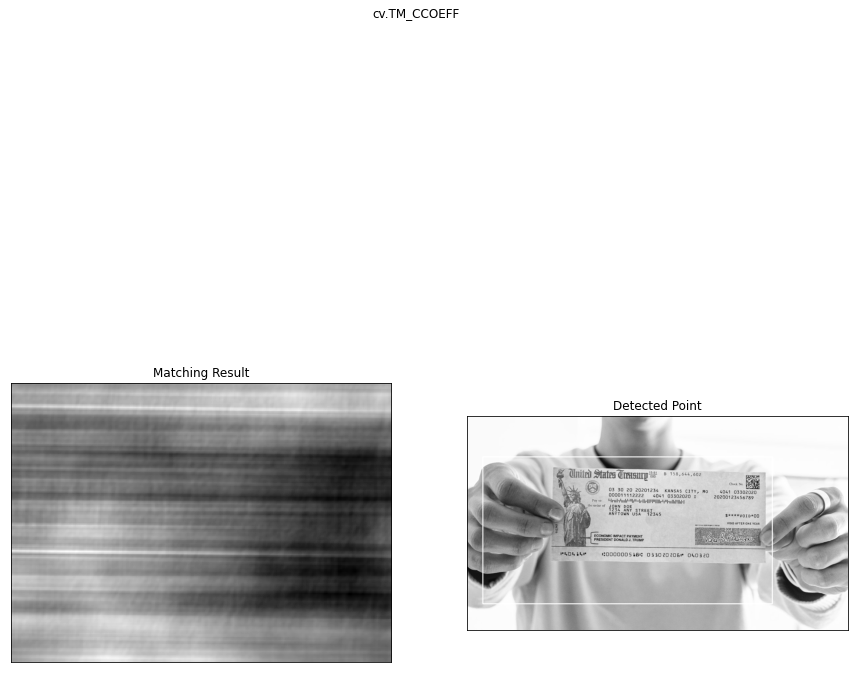

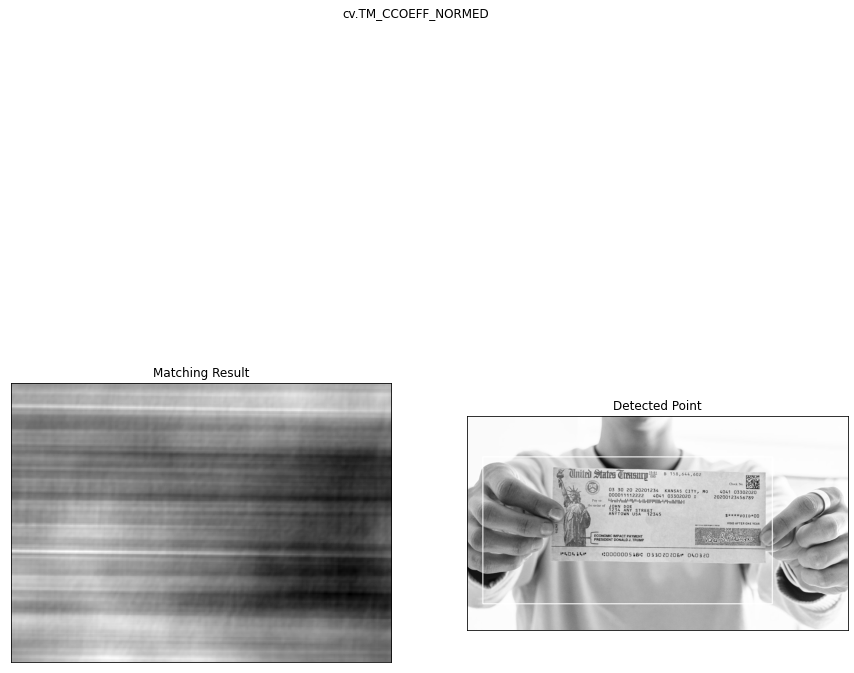

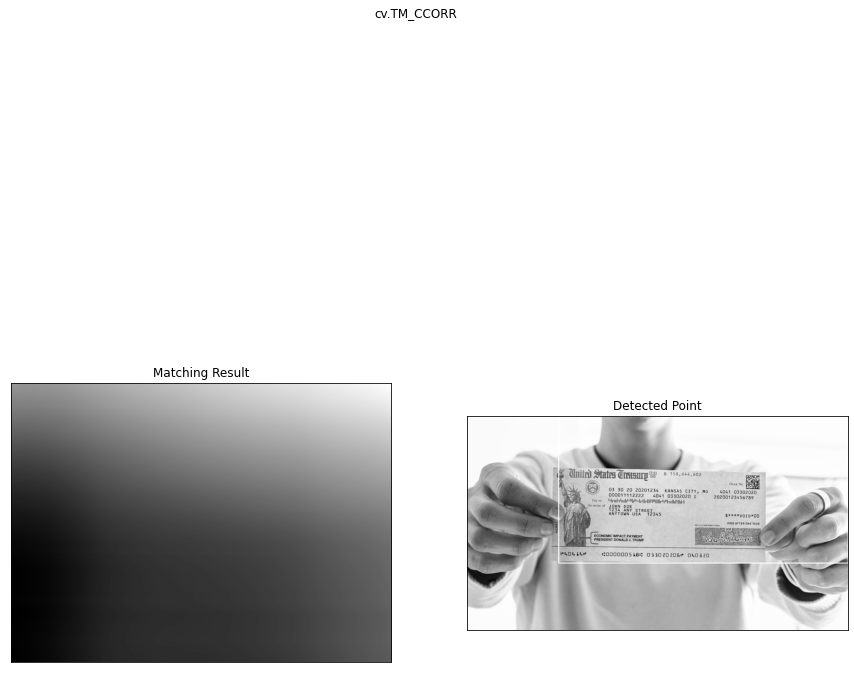

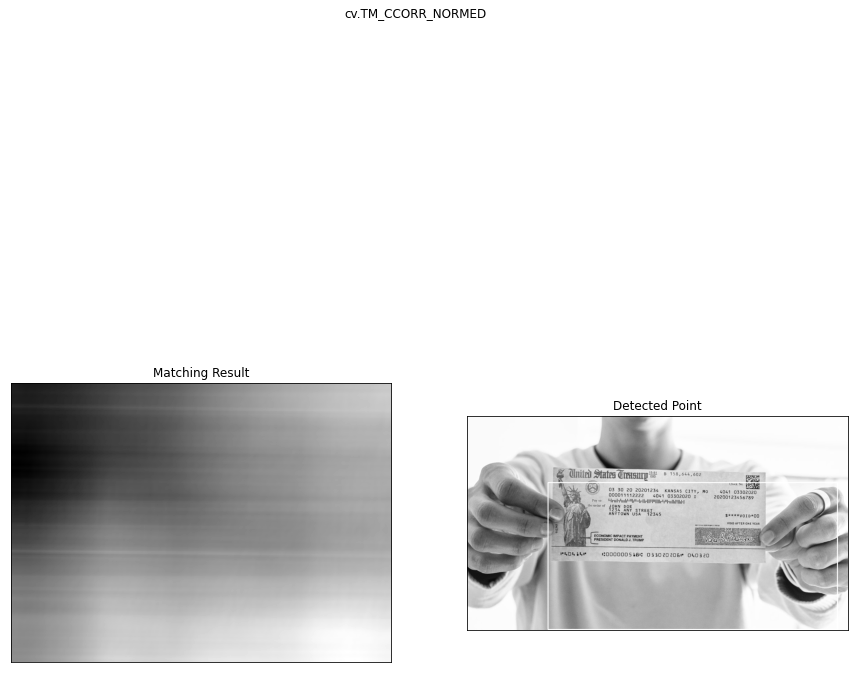

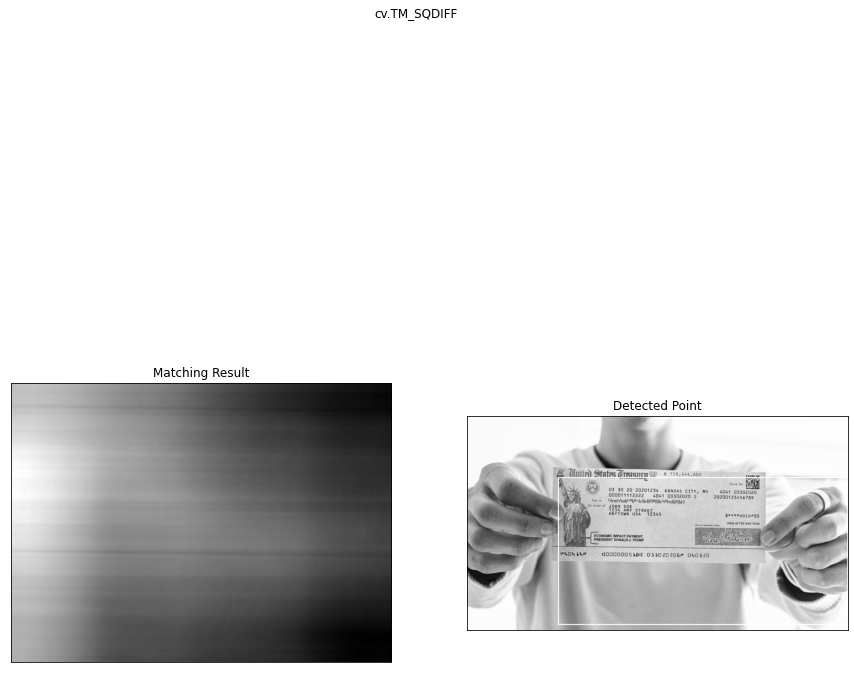

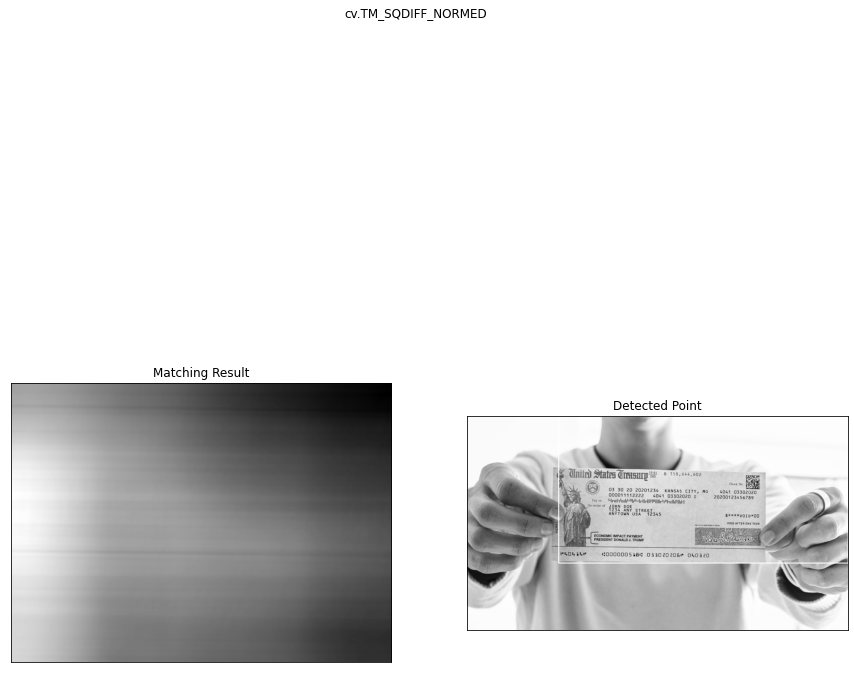

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('samples/check5.jpg',0)
img2 = img.copy()
template = cv.imread('samples/check.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()